### Clase 10 - Introducción a Machine Learning




### 0. Configuramos el entorno de trabajo

In [2]:
# Importamos las librerias necesarias
from statsmodels.stats.descriptivestats import describe
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
# Cargar conjunto de datos de ejemplo
df = sm.datasets.get_rdataset("mtcars", "datasets").data

### 1. EDA

Utilizamos el data set mtcars

#### 1. Hacemos una exploración simple

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, Mazda RX4 to Volvo 142E
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   mpg     32 non-null     float64
 1   cyl     32 non-null     int64  
 2   disp    32 non-null     float64
 3   hp      32 non-null     int64  
 4   drat    32 non-null     float64
 5   wt      32 non-null     float64
 6   qsec    32 non-null     float64
 7   vs      32 non-null     int64  
 8   am      32 non-null     int64  
 9   gear    32 non-null     int64  
 10  carb    32 non-null     int64  
dtypes: float64(5), int64(6)
memory usage: 3.0+ KB


In [11]:
df.head(100)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
rownames,,,,,,,,,,,
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


#### 3. Detectamos y eliminamos registros duplicados

In [12]:
# Detectar registros duplicados
duplicados = df[df.duplicated()]
print("Registros duplicados:")
print(duplicados)

# Eliminar registros duplicados
df = df.drop_duplicates()
print("\nDataFrame después de eliminar duplicados:")
print(df)

Registros duplicados:
Empty DataFrame
Columns: [mpg, cyl, disp, hp, drat, wt, qsec, vs, am, gear, carb]
Index: []

DataFrame después de eliminar duplicados:
                      mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
rownames                                                                       
Mazda RX4            21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
Mazda RX4 Wag        21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
Datsun 710           22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
Hornet 4 Drive       21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
Hornet Sportabout    18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   
Valiant              18.1    6  225.0  105  2.76  3.460  20.22   1   0     3   
Duster 360           14.3    8  360.0  245  3.21  3.570  15.84   0   0     3   
Merc 240D            24.4    4  146.7   62  3.69  3.190  20.00   1   0     4   
Merc 230             22.8    4  140.8   95 

#### 2. Detectamos y tratamos los datos faltantes

In [13]:
# Detectar valores nulos en el DataFrame
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

Valores nulos por columna:
mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64


#### 5. Hacemos un summary de los datos

In [15]:
# Usar describe de statsmodels para obtener estadísticas descriptivas
describe(df)


,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
nobs,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
missing,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.812500
std_err,1.065424,0.315709,21.909473,12.120317,0.094519,0.172968,0.315890,0.089098,0.088210,0.130427,0.285530
upper_ci,22.178818,6.806279,273.663652,170.442885,3.781816,3.556262,18.467883,0.612129,0.579138,3.943131,3.372128
lower_ci,18.002432,5.568721,187.780098,122.932115,3.411309,2.878238,17.229617,0.262871,0.233362,3.431869,2.252872
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.615200
iqr,7.375000,4.000000,205.175000,83.500000,0.840000,1.028750,2.007500,1.000000,1.000000,1.000000,2.000000
iqr_normal,5.467096,2.965204,152.096455,61.898643,0.622693,0.762614,1.488162,0.741301,0.741301,0.741301,1.482602
mad,4.714453,1.585938,108.785742,56.480469,0.453242,0.730187,1.376172,0.492188,0.482422,0.644531,1.300781


#### 6. Hacemos una exploración visual rápida.

##### 6.1 Scatter Plot

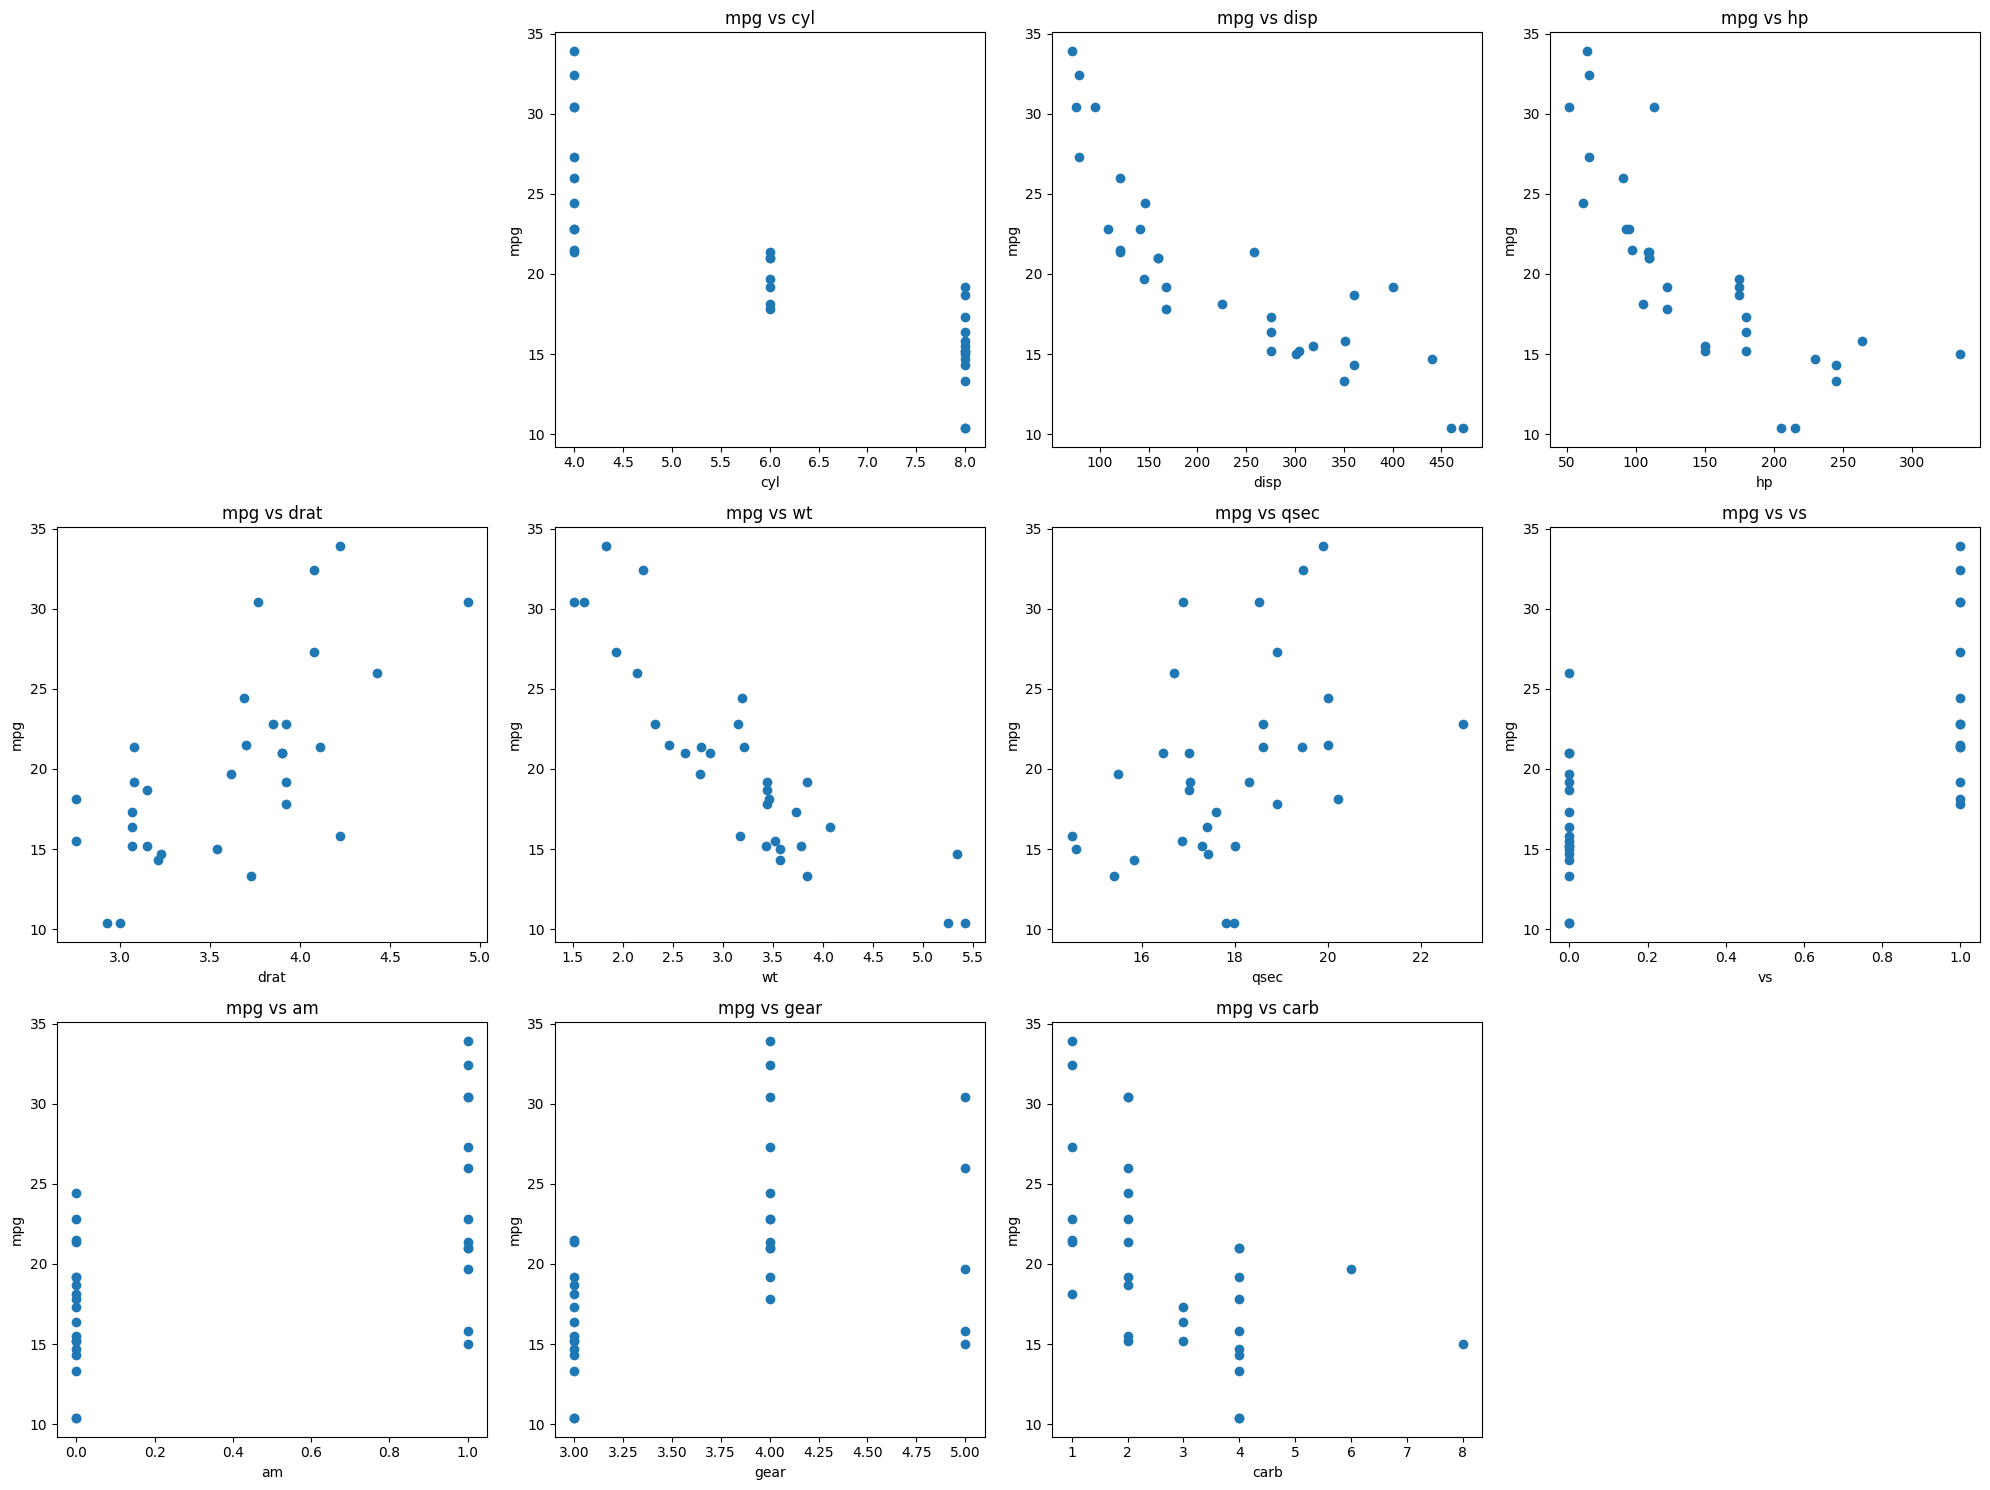

In [18]:
# Crear un scatter plot de cada columna numérica contra 'mpg'
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(20, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    if col != 'mpg':
        axes[i].scatter(df[col], df['mpg'])
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('mpg')
        axes[i].set_title(f'mpg vs {col}')
    else:
        axes[i].axis('off')

# Ocultar ejes vacíos si hay menos de 12 columnas
for j in range(len(numeric_cols), len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

##### 6.2 Hacemos histogramas

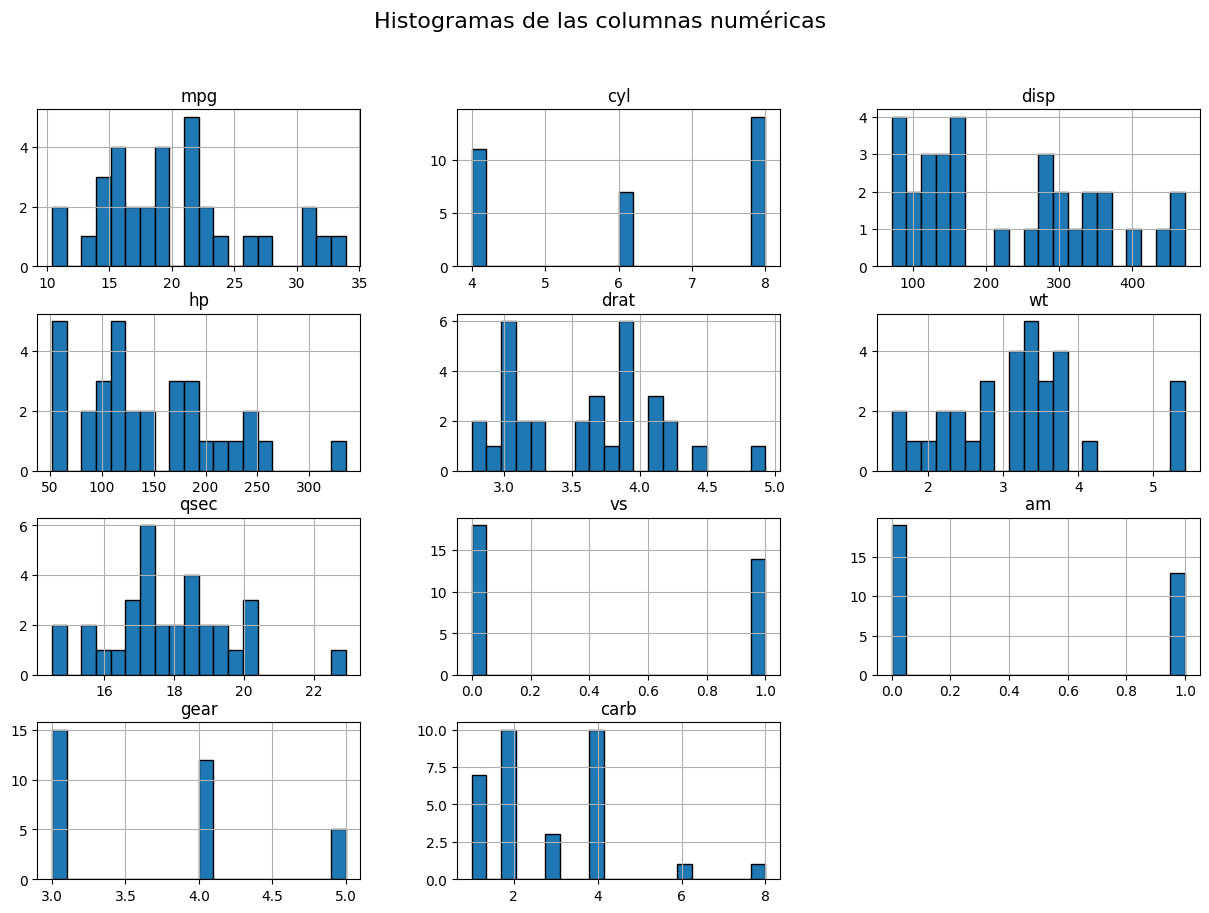

In [19]:
# Generar histogramas para las columnas numéricas
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle("Histogramas de las columnas numéricas", fontsize=16)
plt.show()

##### 6.3 Hacemos Par plots

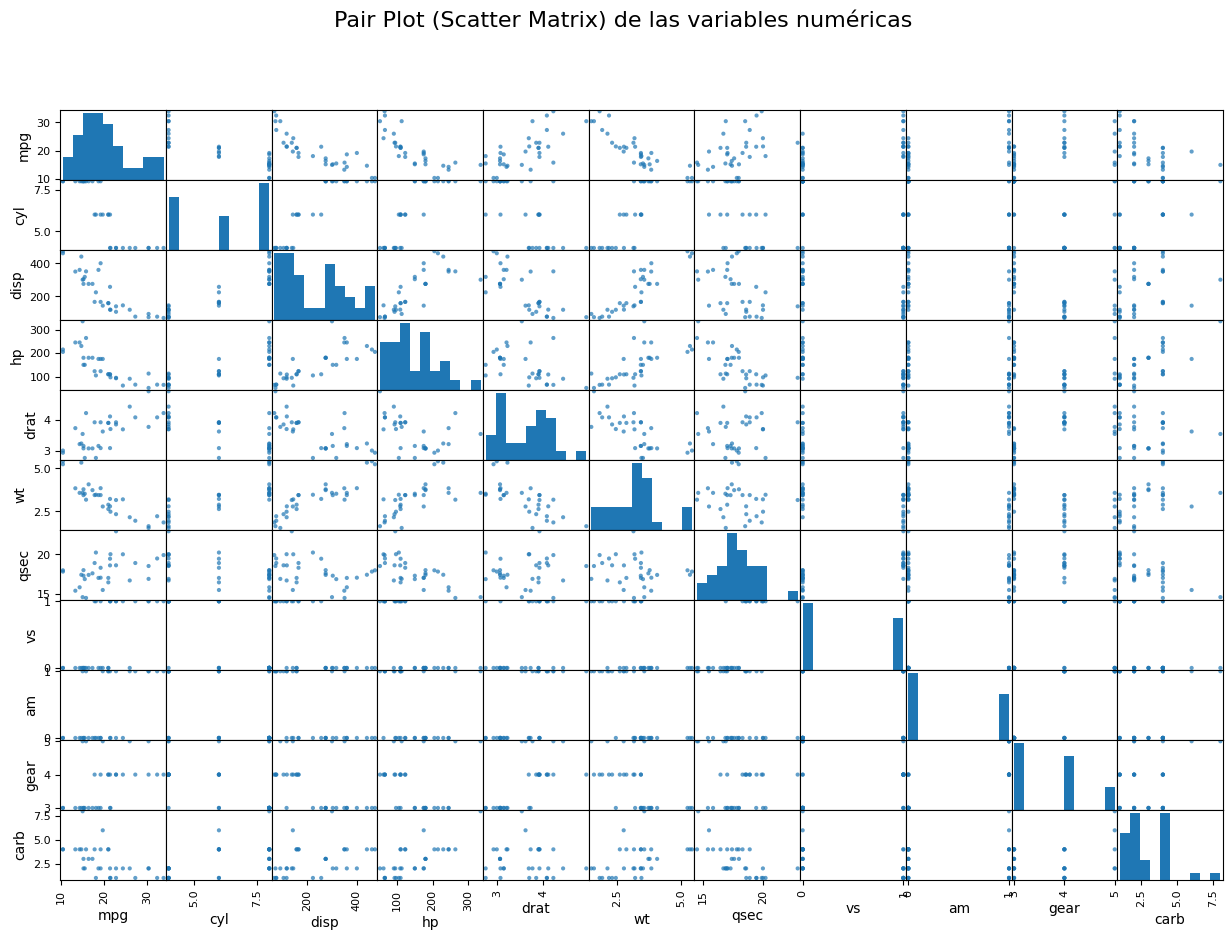

In [20]:
from pandas.plotting import scatter_matrix

scatter_matrix(df, figsize=(15, 10), diagonal='hist', alpha=0.7)
plt.suptitle("Pair Plot (Scatter Matrix) de las variables numéricas", fontsize=16)
plt.show()

### 2. Detección de Outliers y Tratamiento

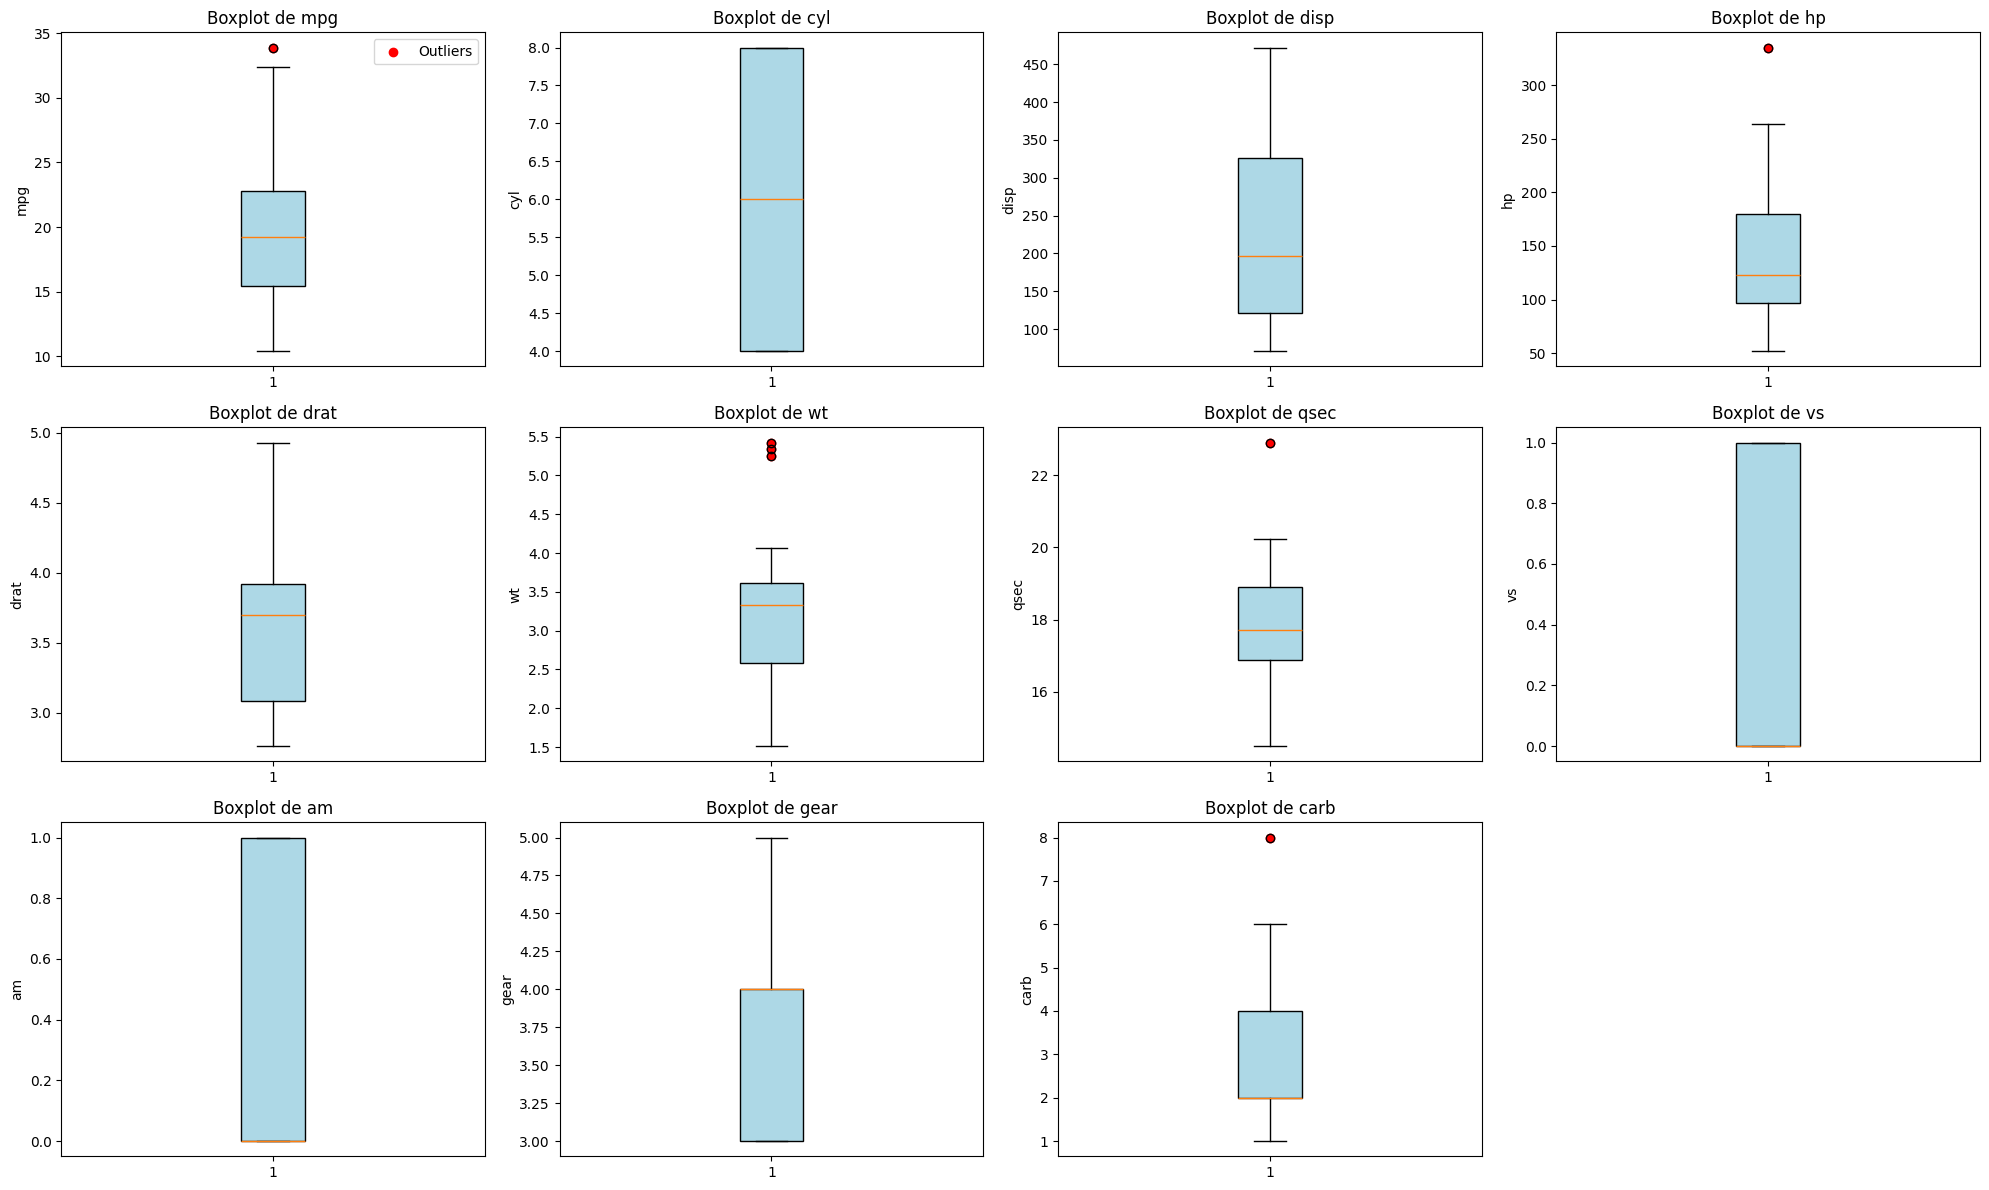

In [21]:
# Crear boxplots para cada columna numérica y marcar outliers
fig, axes_box = plt.subplots(nrows=3, ncols=4, figsize=(20, 12))
axes_box = axes_box.flatten()

for idx, col in enumerate(numeric_cols):
    ax = axes_box[idx]
    ax.boxplot(df[col], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    ax.set_title(f'Boxplot de {col}')
    ax.set_ylabel(col)
    # Detección de outliers usando el método IQR
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    if not outliers.empty:
        ax.scatter([1]*len(outliers), outliers, color='red', label='Outliers')
    if idx == 0 and not outliers.empty:
        ax.legend()

# Ocultar ejes vacíos si hay menos de 12 columnas
for idx in range(len(numeric_cols), len(axes_box)):
    axes_box[idx].axis('off')

plt.tight_layout()
plt.show()

#### 3. Regresión Lineal Simple

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.602
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     45.46
Date:                Tue, 20 May 2025   Prob (F-statistic):           1.79e-07
Time:                        18:31:17   Log-Likelihood:                -87.619
No. Observations:                  32   AIC:                             179.2
Df Residuals:                      30   BIC:                             182.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.0989      1.634     18.421      0.0

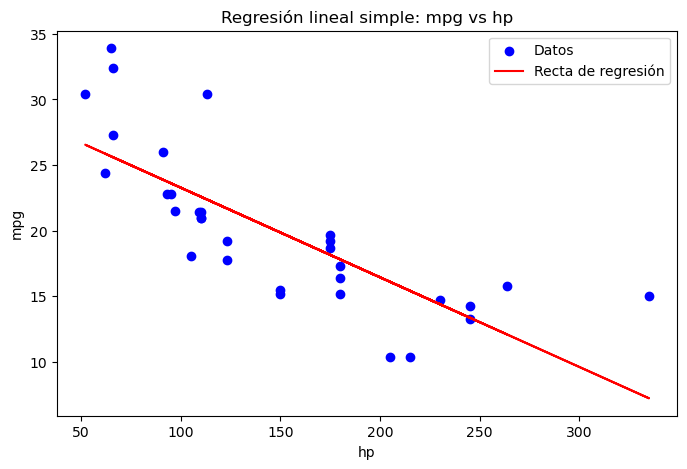

In [10]:
# Ejemplo de regresión lineal simple: mpg vs hp
import statsmodels.api as sm

X = data['hp']
y = data['mpg']

# Agregar constante para el intercepto
X_const = sm.add_constant(X)

# Ajustar el modelo
modelo = sm.OLS(y, X_const).fit()

# Mostrar resumen del modelo
print(modelo.summary())

# Graficar los datos y la recta de regresión
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, modelo.predict(X_const), color='red', label='Recta de regresión')
plt.xlabel('hp')
plt.ylabel('mpg')
plt.title('Regresión lineal simple: mpg vs hp')
plt.legend()
plt.show()

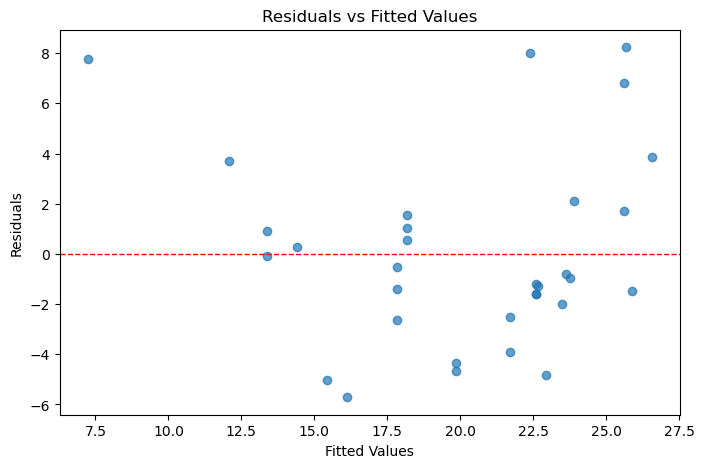

In [13]:
# Get residuals
residuals = modelo.resid

# Plot residuals
plt.figure(figsize=(8, 5))
plt.scatter(modelo.fittedvalues, residuals, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Residuals vs Fitted Values")
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.show()

In [17]:
# Crear una tabla que muestre los valores reales y predichos de mpg
tabla_comparacion = resultado_pred.copy()
tabla_comparacion.columns = ['mpg_real', 'mpg_predicho']
print(tabla_comparacion)

                     mpg_real  mpg_predicho
rownames                                   
Mazda RX4                21.0     22.593750
Mazda RX4 Wag            21.0     22.593750
Datsun 710               22.8     23.753631
Hornet 4 Drive           21.4     22.593750
Hornet Sportabout        18.7     18.158912
Valiant                  18.1     22.934891
Duster 360               14.3     13.382932
Merc 240D                24.4     25.868707
Merc 230                 22.8     23.617174
Merc 280                 19.2     21.706782
Merc 280C                17.8     21.706782
Merc 450SE               16.4     17.817770
Merc 450SL               17.3     17.817770
Merc 450SLC              15.2     17.817770
Cadillac Fleetwood       10.4     16.112064
Lincoln Continental      10.4     15.429781
Chrysler Imperial        14.7     14.406357
Fiat 128                 32.4     25.595794
Honda Civic              30.4     26.550990
Toyota Corolla           33.9     25.664022
Toyota Corona            21.5   